<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (BTC Inc.) using the past 60 day stock price. 

In [214]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [215]:
#Get the stock quote
data = yf.download('BTC-USD', start=start_date, end=end_date)
#df = web.DataReader('BTC-USD', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...
2021-01-25,32285.798828,34802.742188,32087.787109,32366.392578,32366.392578,59897054838
2021-01-26,32358.613281,32794.550781,31030.265625,32569.849609,32569.849609,60255421470
2021-01-27,32564.029297,32564.029297,29367.138672,30432.546875,30432.546875,62576762015


In [216]:
#Get the number of rows and columns in the data set
data.shape



(576, 6)

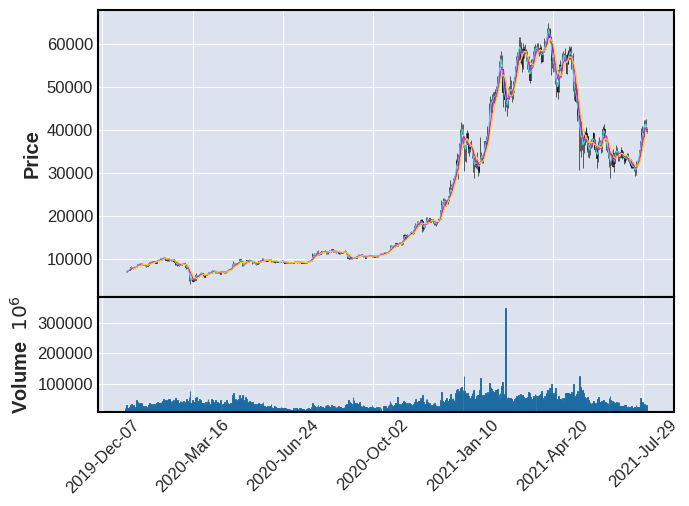

In [217]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [218]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

461

In [219]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[3.80878964e-02],
       [3.44197892e-02],
       [4.05601903e-02],
       [4.16838784e-02],
       [4.16951651e-02],
       [4.78097309e-02],
       [5.45490980e-02],
       [5.31169134e-02],
       [4.96864957e-02],
       [5.45979907e-02],
       [5.23938096e-02],
       [5.50411610e-02],
       [5.42159841e-02],
       [6.58944250e-02],
       [6.55398554e-02],
       [6.41180065e-02],
       [6.76246286e-02],
       [6.78598905e-02],
       [6.38183274e-02],
       [6.29879785e-02],
       [6.44957169e-02],
       [6.33849089e-02],
       [5.86976060e-02],
       [5.93625158e-02],
       [5.80369840e-02],
       [6.19490288e-02],
       [6.72962863e-02],
       [7.49632955e-02],
       [7.42464315e-02],
       [7.75328575e-02],
       [7.48255853e-02],
       [7.55490394e-02],
       [7.47202755e-02],
       [7.38516366e-02],
       [7.19286320e-02],
       [7.93170007e-02],
       [8.13052567e-02],
       [8.24352513e-02],
       [8.36170833e-02],
       [8.79147634e-02],


In [220]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.0380879 , 0.03441979, 0.04056019, 0.04168388, 0.04169517,
       0.04780973, 0.0545491 , 0.05311691, 0.0496865 , 0.05459799,
       0.05239381, 0.05504116, 0.05421598, 0.06589442, 0.06553986,
       0.06411801, 0.06762463, 0.06785989, 0.06381833, 0.06298798,
       0.06449572, 0.06338491, 0.05869761, 0.05936252, 0.05803698,
       0.06194903, 0.06729629, 0.0749633 , 0.07424643, 0.07753286,
       0.07482559, 0.07554904, 0.07472028, 0.07385164, 0.07192863,
       0.079317  , 0.08130526, 0.08243525, 0.08361708, 0.08791476,
       0.08347173, 0.08947906, 0.09149193, 0.08958402, 0.09125379,
       0.08403233, 0.08480128, 0.0806277 , 0.08834738, 0.07965806,
       0.07923246, 0.08056447, 0.08016709, 0.08463184, 0.07994487,
       0.07467483, 0.0657707 , 0.06515517, 0.06324104, 0.06199479])]
[0.0613617332054467]



In [221]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(401, 60, 1)

In [222]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [223]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [224]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

401/401 [==============================] - 17s 35ms/step - loss: 0.0166


In [225]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [226]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [227]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [228]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

1227.8807744565217

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


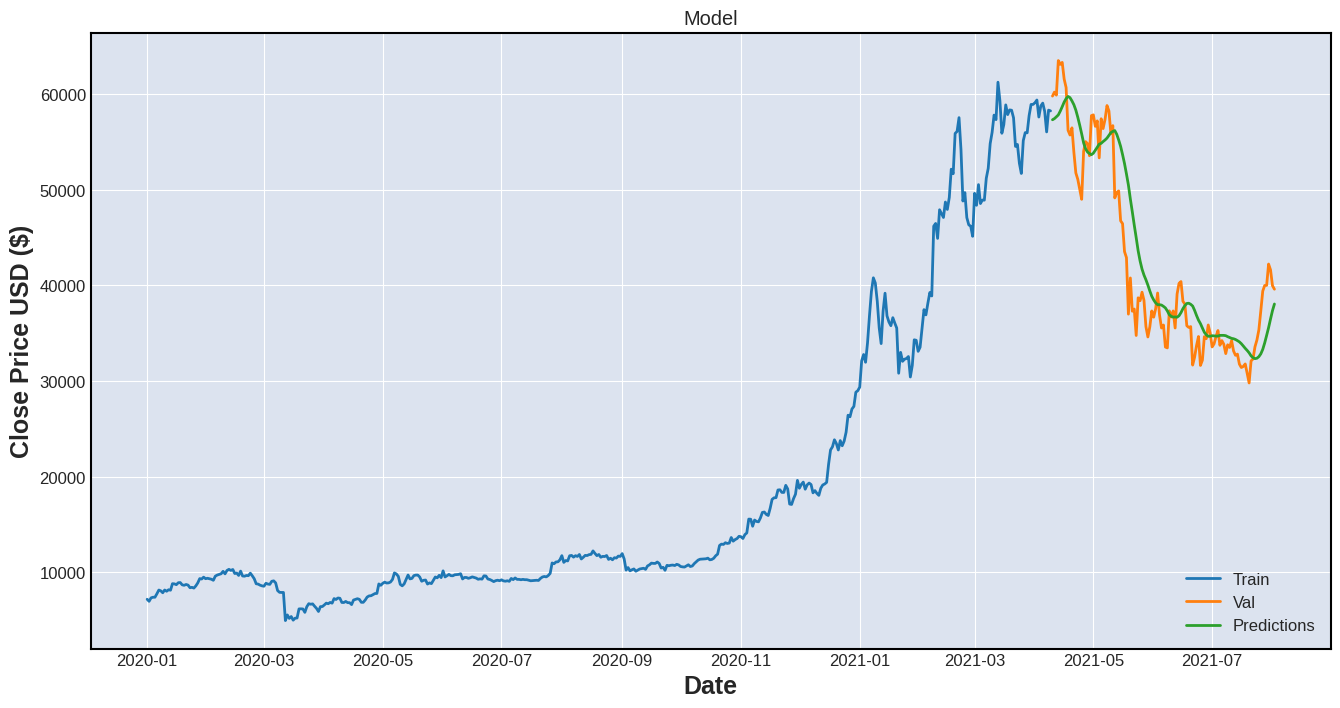

In [230]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [231]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-10,59793.234375,57317.445312
2021-04-11,60204.964844,57438.367188
2021-04-12,59893.453125,57626.992188
2021-04-13,63503.457031,57825.375000
2021-04-14,63109.695312,58223.882812
...,...,...
2021-07-29,40008.421875,34780.996094
2021-07-30,42235.546875,35589.613281
2021-07-31,41626.195312,36495.667969


In [233]:
#get the quote
apple_quote = yf.download('BTC-USD', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[38590.684]]
